In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris

# kNN

The k-Nearest Neighbors (kNN) algorithm is a simple, yet effective machine learning technique used for classification. In this tutorial, we will use the kNN classifier to classify species of iris flowers from the Iris dataset. This dataset includes data on sepal length, sepal width, petal length, and petal width of iris flowers, along with their species.

## Data Loading
Can directly be loaded from sklearn.datasets

In [4]:
# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for easier manipulation
iris_df = pd.DataFrame(X, columns=iris.feature_names)
iris_df['species'] = y

# Display random 5 rows of the dataset
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
110,6.5,3.2,5.1,2.0,2
73,6.1,2.8,4.7,1.2,1
100,6.3,3.3,6.0,2.5,2
65,6.7,3.1,4.4,1.4,1
103,6.3,2.9,5.6,1.8,2


## Exploratory Data Analysis (EDA) of the Iris Dataset

We will analyze the distributions of the features (sepal length, sepal width, petal length, petal width) and the classes (species of the iris flowers) in the Iris dataset.

Summary Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     species  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


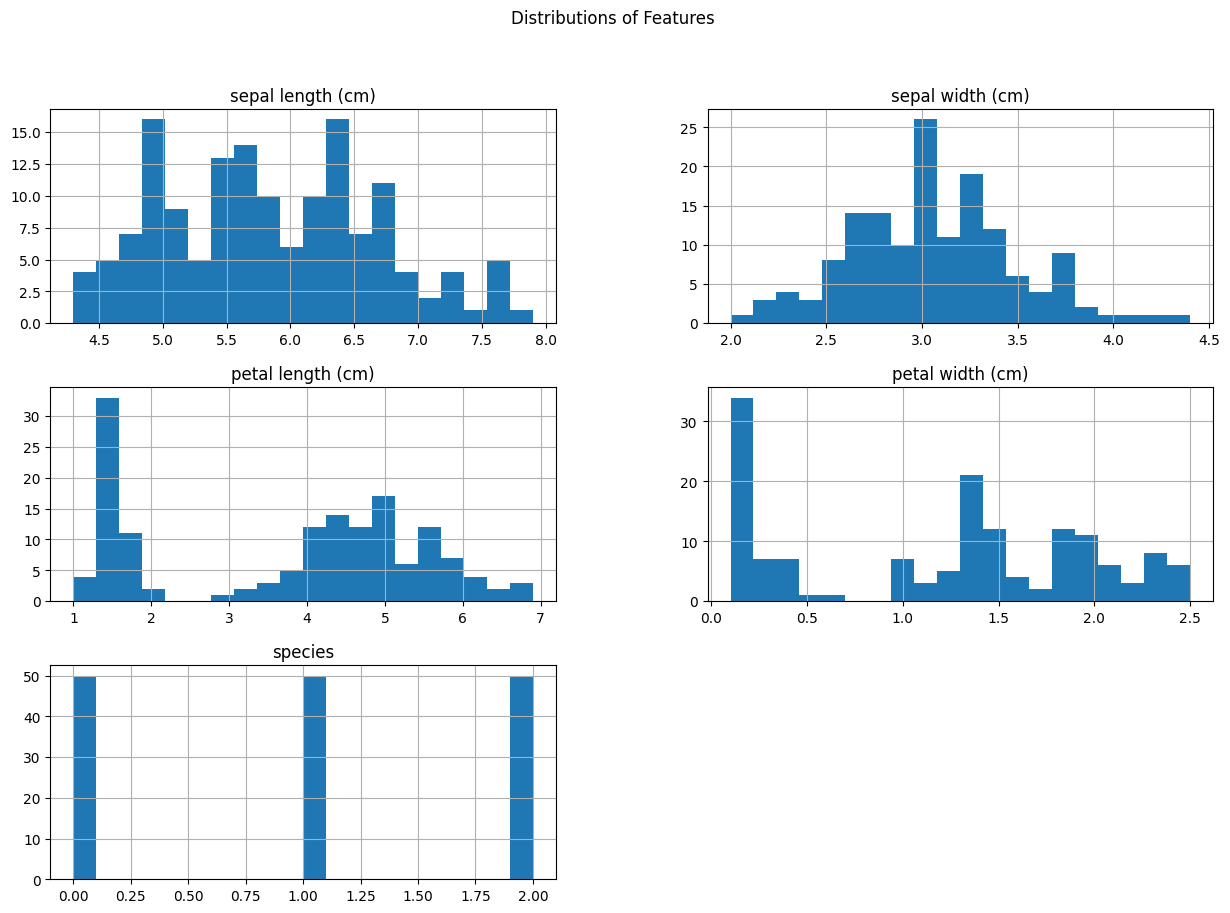

In [5]:
# Display summary statistics
print("Summary Statistics:")
print(iris_df.describe())

# Plotting distributions of features
iris_df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Distributions of Features")
plt.show()


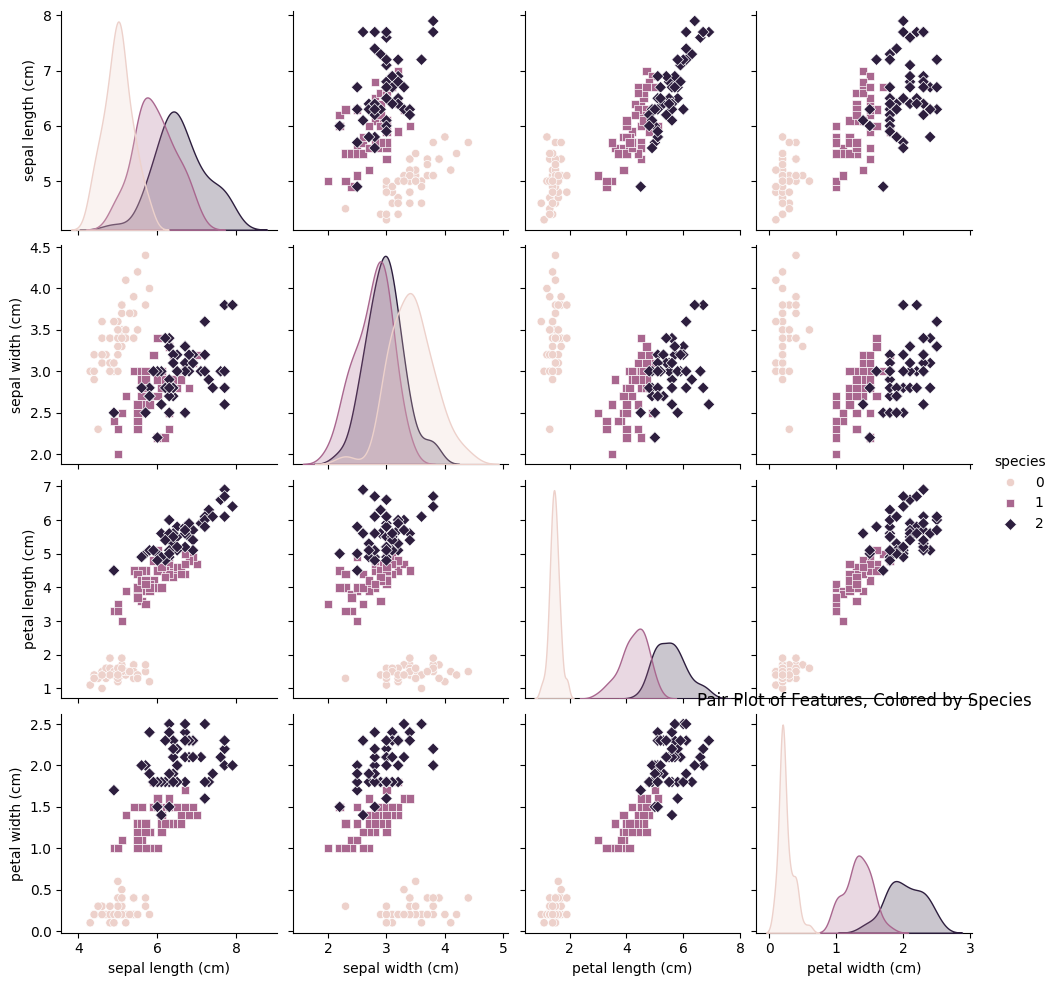

In [6]:
import seaborn as sns

# Pair plot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"])
plt.title("Pair Plot of Features, Colored by Species")
plt.show()


## Outlier Detection using Box Plots
* kNN makes predictions based on the nearest neighbors in the feature space --> outliers can significantly skew the results, especially if the number of neighbors (k) is small.

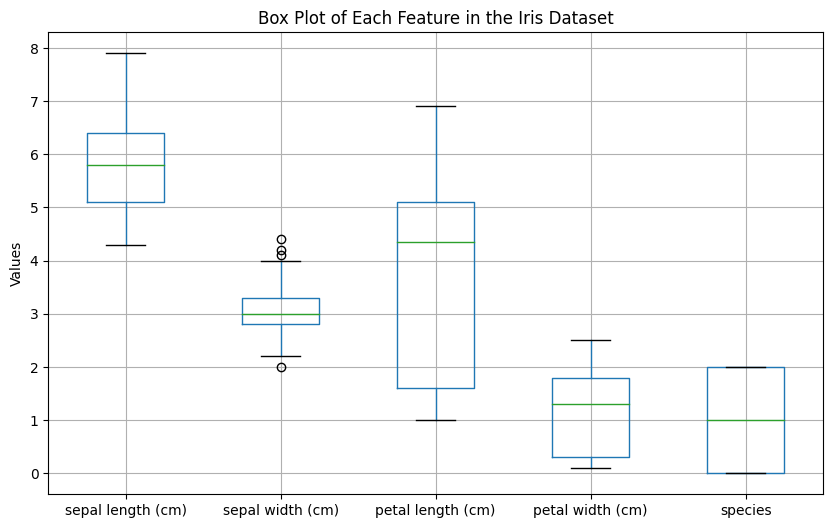

In [7]:
# Box plots for each feature
plt.figure(figsize=(10, 6))
iris_df.boxplot()
plt.title('Box Plot of Each Feature in the Iris Dataset')
plt.ylabel('Values')
plt.show()
